<a href="https://colab.research.google.com/github/El-Bjorn/3DmodelTesting/blob/master/Working_CoreMLtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do HDf5 -> CoreML conversion and store mlmodel


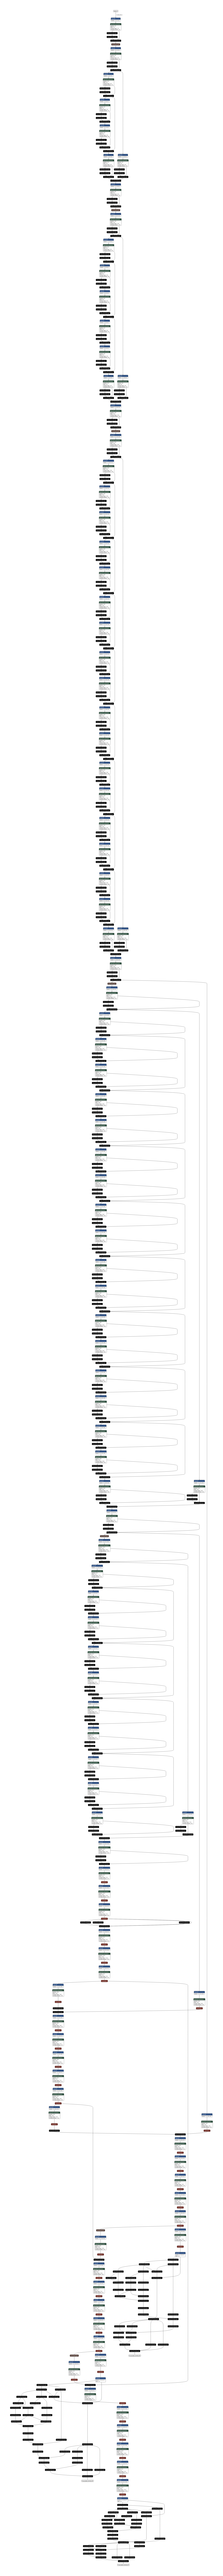

In [23]:
# Netron PNG from 'model_from_shoumik.h5'
from IPython.display import Image
Image('/content/drive/MyDrive/Andium/model_from_shoumik.png')

In [ ]:
# model generation cell. Soring as 'dat_mlmodel_vX.mlmodel'
!pip install -U tensorflow==2.6
!pip install -U keras==2.6.0
!pip install coremltools
import tensorflow as tf
from tensorflow import keras
import coremltools as ct

#from google.colab import drive
#drive.mount('/content/drive')

# get input labels
class_labels = []
with open('/content/drive/MyDrive/Andium/labels.txt', 'r') as data:
  for i, label in enumerate(data):
    class_labels.append(label.strip('\n'))
print(class_labels)
input_names = ['image']
output_names = ['52x52','26x26','13x13']

keras_model = tf.keras.models.load_model("/content/drive/MyDrive/Andium/model_from_shoumik.h5")

print(keras_model)

inputs = [ct.ImageType(scale=1/255.0, bias=[0, 0, 0], color_layout="BGR")]
classifier_config = ct.ClassifierConfig(class_labels)

coreml_model = ct.convert(keras_model,
                          convert_to='neuralnetwork',
                          source='tensorflow',
                          #classifier_config=classifier_config,
                          debug=True)

coreml_model.short_description = "Andium object detection"
#coreml_model = ct.convert(keras_model, inputs=input_names, outputs=output_names)
#coreml_model = ct.convert(keras_model, input_names=input_names, 
#                          output_names=output_names,
#                          class_labels=class_labels)
#coreml_model.save("/content/convert_dat_model.mlmodel")
#coreml_model.save("/content/drive/MyDrive/Andium/MLProgram_v1.mlpackage")
coreml_model.save("/content/drive/MyDrive/Andium/dat_mlmodel_v6_no_config.mlmodel")
print(coreml_model)
#model_spec = coreml_model._spec
#print(model_spec)
#nn = model_spec.neuralNetwork
#print(nn)
print("done.....")

print(ct.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 564.4 MB 168 kB/s
     |████████████████████████████████| 14.8 MB 12.1 MB/s 
     |████████████████████████████████| 132 kB 69.5 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=de44ad6a757c19353f33146dd9c099d47fc6a6cc83f26b5ae42140d5328cc192
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68712 sha256=536a818d630e7b5189cafb0f4da17b36d2b41fbe1bef9113bbe47ec95d4a028e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 13.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.2 MB/s 


['tank', 'flare stack', 'flare', 'black smoke', 'pickup truck', 'hauler truck', 'backhoe', 'person', 'compressor', 'pump jack', 'lift', 'semi truck', 'utility vehicle', 'cow']


Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 1390/1390 [00:05<00:00, 258.70 ops/s]


input {
  name: "input_3"
  type {
    multiArrayType {
      shape: 1
      shape: 416
      shape: 416
      shape: 3
      dataType: FLOAT32
      shapeRange {
        sizeRanges {
          lowerBound: 1
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 416
          upperBound: 416
        }
        sizeRanges {
          lowerBound: 416
          upperBound: 416
        }
        sizeRanges {
          lowerBound: 3
          upperBound: 3
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "Identity_1"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "Identity_2"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  shortDescription: "Andium object detection"
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.6.0"
  }
  userDefined {
    key: "com.github.apple.coremlto

In [22]:
# Netron PNG from dat_mlmodel_v6.mlmodel
Image('/content/drive/MyDrive/Andium/dat_mlmodel_v6.png')

# Load model spec from saved mlmodel

In [13]:
# load latest generated model and store in myModel, model_spec = MyModel.get_spec()
!pip install -U tensorflow==2.6
!pip install -U keras==2.6.0
!pip install coremltools
import tensorflow as tf
from tensorflow import keras
import coremltools as ct
#from google.colab import drive
#drive.mount('/content/drive')
#!pip install coremltools
#import coremltools as ct
print("loadin mlmodel...")
#
myModel = ct.models.MLModel("/content/drive/MyDrive/Andium/dat_mlmodel_v6.mlmodel")
#myModel = ct.models.MLModel("/content/convert_dat_model.mlmodel")
#print(myModel)
print("getting spec... ")
model_spec = myModel.get_spec()
#print(model_spec.description)
print("done.....")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loadin mlmodel...
getting spec... 
done.....


# Poke around in model protobuf

In [19]:
# model examination
print("model type: " + model_spec.WhichOneof('Type'))
print("\n" + repr(len(myModel.input_description)) + " - input:")
for i in myModel.input_description:
  print(i)
print("\n " + repr(len(myModel.output_description)) +  " - outputs:")
for o in myModel.output_description:
  print(o)
print("\nspec input:")
print(model_spec.description.input[0])
print("\nspec outputs:")
print(model_spec.description.output[0])
print(model_spec.description.output[1])
print(model_spec.description.output[2])
print(model_spec.description.output[3])

nn=model_spec.neuralNetworkClassifier
print(len(nn.layers),end="")
print(" total layers: ")
print("\nlayer[5] = ", end='')
print(nn.layers[5])
print("\noutput[2] = ", end='')
print(model_spec.description.output[2])

# open layers file
#f = open("/content/drive/MyDrive/Andium/NN_layers.txt","x")

print("----- layers -----")
for layer in nn.layers:
  print("in: ")
  for i in range(0,len(layer.input)):
    print(layer.input[i])
  print("name: ", end='')
  print(layer.name)
  #f.write(layer.name + "\n")
  #print("type: ",end='')
  #print(layer)
  print("out: ") 
  print(layer.output)
  print("----------------------")
print("metadata...")
myModel.user_defined_metadata
#f.close()

#myModel.summary()


model type: neuralNetworkClassifier

1 - input:
input_3

 4 - outputs:
Identity
Identity_1
Identity_2
classLabel

spec input:
name: "input_3"
type {
  multiArrayType {
    shape: 1
    shape: 416
    shape: 416
    shape: 3
    dataType: FLOAT32
    shapeRange {
      sizeRanges {
        lowerBound: 1
        upperBound: -1
      }
      sizeRanges {
        lowerBound: 416
        upperBound: 416
      }
      sizeRanges {
        lowerBound: 416
        upperBound: 416
      }
      sizeRanges {
        lowerBound: 3
        upperBound: 3
      }
    }
  }
}


spec outputs:
name: "Identity"
type {
  dictionaryType {
    stringKeyType {
    }
  }
}

name: "Identity_1"
type {
  multiArrayType {
    dataType: FLOAT32
  }
}

name: "Identity_2"
type {
  multiArrayType {
    dataType: FLOAT32
  }
}

name: "classLabel"
type {
  stringType {
  }
}

473 total layers: 

layer[5] = name: "pad_0"
input: "functional_5/tf_op_layer_Mul_174/Mul_174"
output: "pad_0"
padding {
  constant {
  }
  padd

{'com.github.apple.coremltools.source': 'tensorflow==2.6.0', 'com.github.apple.coremltools.version': '5.2.0'}

In [ ]:
# create NMS model
nms_spec = ct.proto.Model_pb2.Model()
nms_spec.specificationVersion = 3
nms_spec.description.input.add()
nms_spec.description.output.add()
#nms_spec.description.input[0].Pa
print(nms_spec)

specificationVersion: 3
description {
  input {
  }
  output {
  }
}

